2020-7-24

# What is Machine Learning (ML) and why is it so powerful/useful?

*   You don't need to specify all the rules (like in traditional programming). The model (ML algorithms) will figure out the relationships in the data and try to make predictions.
*   ML algorithms can catch complex patterns in the data (which are often in high dimensions and invisible to the naked eye).

Because of that, ML algorithms can help us make decisions and predictions that we are unable to make with our own puny brain. 🧠

# 👉 Two main types of Machine Learning: Supervised and Unsupervised

The difference is whether you have a training target (label) in your data.

Supervised learning:
*   Classification (KNN classifier, Random Forest classifier, etc.)
*   Regression (Linear regression, Random Forest regressor, etc.)

Unsupervised learning:
*   Clustering (KMeans, DBSCAN, etc.)

# 👉 One very important concept in ML: [train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

*   If we just fit the model on the whole dataset and use it to predict the same whole dataset, then it's not ML.

For ML, we want to fit the model on some existing data (training), and then test it on some new **unseen** data to evaluate its predictive power. That's why we need the train-test split for our dataset. If the model trained on the training set can perform well on the test set, then we can be confident that the model will also be able to give reliable predictions for new coming data.



In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

# Load data:

Bike Sharing Dataset: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Attribute Information:

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [ ]:
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id="1AMhUz8pbzu0PXtw-VsORYcXULBJ7nGP3",
                                    dest_path="./bikes_sharing.csv",
                                    unzip=False)

Note: for ML, categorical features should be one-hot encoded as new dummy variables, but I'm skipping this step for the simplicity of the demonstration.

You can use pd.get_dummies() to do one-hot encoding:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

In [ ]:
df = pd.read_csv('bikes_sharing.csv', header = 0, sep = ',')
df["high_count"] = df["count"]>200 #generate a binary column to indicate if the bikes have high count (to be used as the label for classification)
df["datetime"] = pd.to_datetime(df["datetime"]) #set this column as the datetime data type
df["hour"] = df["datetime"].dt.hour #extract the hour of the day for each sample and store it in a new column (this is a feature engineering example)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,high_count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,False,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,False,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,False,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,False,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,True,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,True,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,False,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,False,22


# Classification demo
Goal: to predict whether there will be a high count of bikes (>200 per hour) when we don't know the bike count for any new observation.

## Select X and y

X is our features (predictor variables or input for the ML model), and y is the label of the data (i.e. the training target for the ML model).

In this case, I'm choosing the binary column "high_count" as y, which contains values of either True or False. So, this is a binary classification problem.

We can include any combinations of features we want as X. But don't include features that won't make sense to the model (like "datetime") or features that will leak information about our training target (like "count", "high_count", "casual" and "registered").

Note: we use the capital letter X to indicate it's 2-D, and we use the small letter y to indicate it's 1-D.

In [ ]:
print(df.columns.to_list())

['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'high_count', 'hour']


In [ ]:
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']]
y = df["high_count"]

print(X.shape)
print(y.shape)

(10886, 9)
(10886,)


## Train-test split

I'm going to use 80% of the data for training and 20% for testing.

The ratio is usually between 70:30 to 80:20.

(Note: in production, the features must match the features in training)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 9)
(2178, 9)
(8708,)
(2178,)


## Example: Classification using Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Random Forest is an ensemble learning method based on decision trees (you have to take the ML course if you want to know what those terms mean and why it works).

### Training

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1) #create an instance of the model
rf_clf.fit(X_train, y_train) #train the model on the training set

CPU times: user 2.58 s, sys: 67.8 ms, total: 2.65 s
Wall time: 2.38 s


RandomForestClassifier(n_estimators=200, n_jobs=-1)

### Testing

In [ ]:
y_pred = rf_clf.predict(X_test) #make predictions for the test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(2178,)


array([False,  True,  True, ...,  True, False, False])

In [ ]:
#compare y_pred to our actual y_test
(y_pred == y_test).sum()

1905

Wow! That's a lot of correct predictions! 🤑🤑🤑

Let's calculate the accuracy of our predictions.

In [ ]:
# two ways to calculate accuracy
# noob way:
print((y_pred == y_test).sum()/len(y_test))

# pro way:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8746556473829201
0.8746556473829201


So, our Random Forest classifier can predict if there will be a high count of bikes in any hour with nearly 90% accuracy!!!! 😍😍😍

But is this too good to be true?

![alt text](https://i.imgur.com/VyELZl8.gif)

In [ ]:
y_test.value_counts()

False    1308
True      870
Name: high_count, dtype: int64

In [ ]:
y_test.value_counts()[0]/y_test.value_counts().sum()

0.6005509641873278

So, even though our data are slightly imbalanced, our model is indeed making predictions far better than pure guessing!

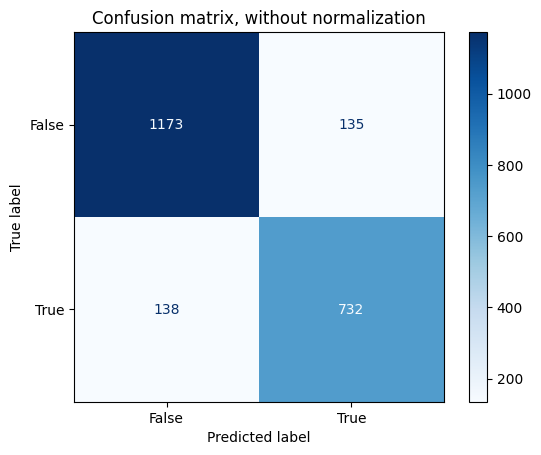

In [ ]:
#visualize classification results with confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
with plt.style.context("default"): #temporarily set the plot style
    disp = ConfusionMatrixDisplay.from_estimator(
        rf_clf,
        X_test,
        y_test,
        display_labels=[False, True],
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Confusion matrix, without normalization")

### Feature importance

Feature importance is available from decision-tree-based models in sklearn. More important features are giving the model more information for making the predictions. Let's take a look at the most importance features for our model.

Note: feature importance is NOT correlation, so don't interpret it that way!

In [ ]:
df_imp = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp

,Feature Importance
hour,0.427830
humidity,0.128342
atemp,0.121511
temp,0.109749
windspeed,0.084166
season,0.051116
workingday,0.041736
weather,0.031867
holiday,0.003683


<ipython-input-44-cc676e51d5e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Feature Importance", y=df_imp.index, data=df_imp, palette="summer")


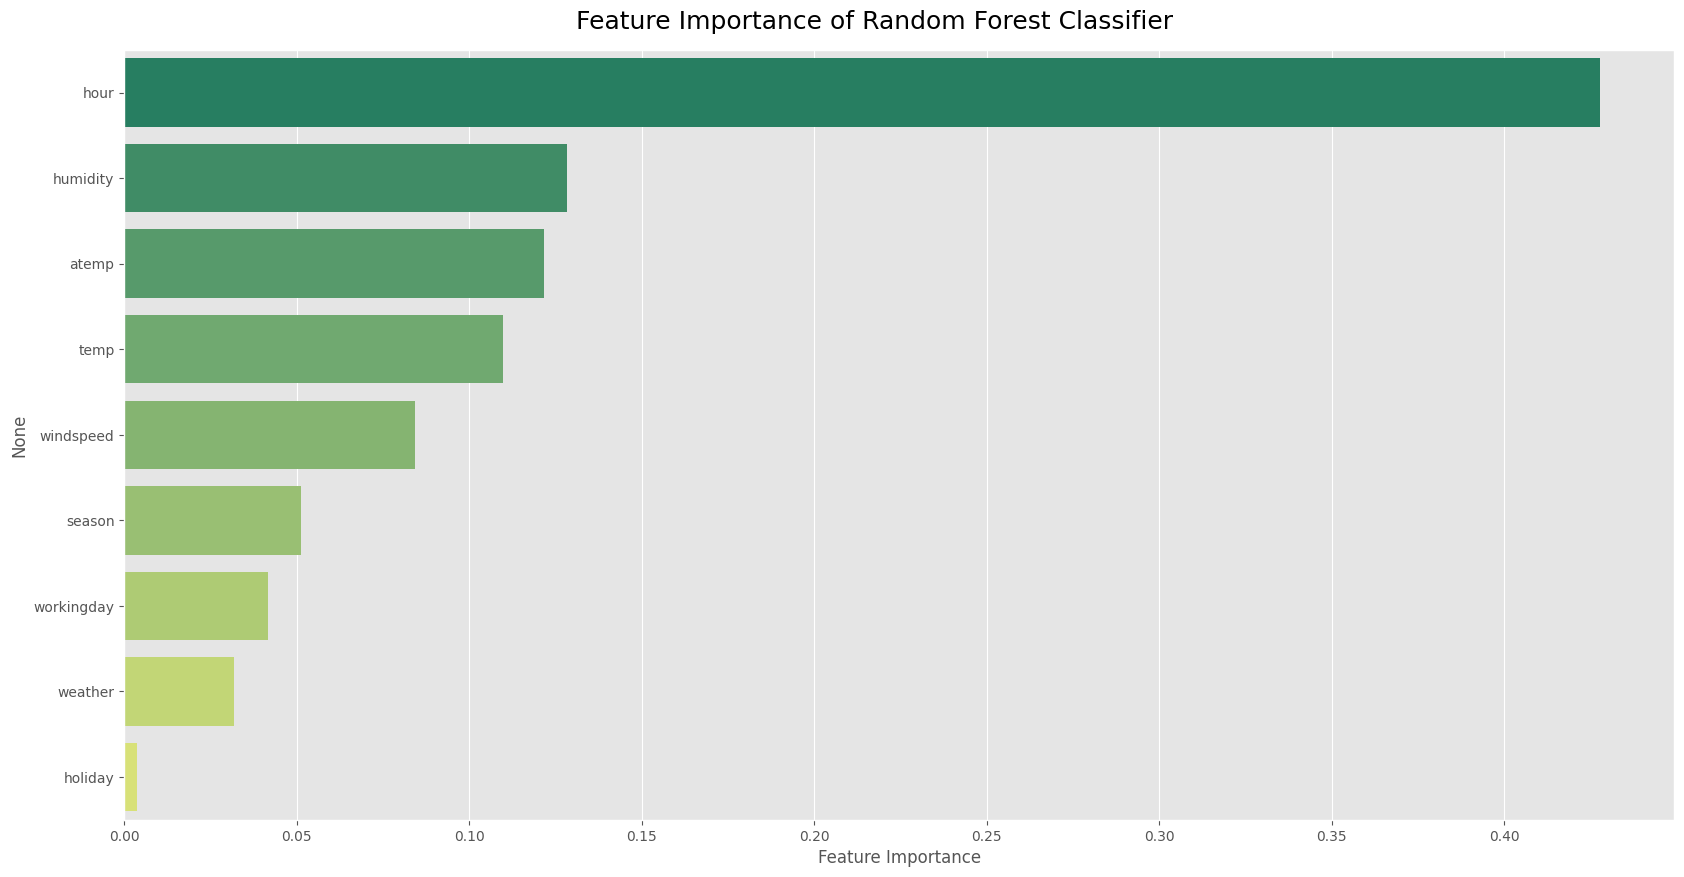

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x="Feature Importance", y=df_imp.index, data=df_imp, palette="summer")
fig.suptitle("Feature Importance of Random Forest Classifier", y=0.92, fontsize=18);

## Example: Classification using KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

KNN means K-nearest neighbours. It classifies a data point by finding the class of its nearest neighbours (in the n-dimensional space of n features).

One important note: when an ML algorithm involves distance measurement like this, you must make sure that all your features (input columns of your X) are on a comparable scale. Otherwise, from the model's perspective, features with large values will have greater weight and features with small values will be ignored. This step is called **feature scaling**. If you don't do this step correctly, your model will have poor performance!

In the previous example, I did not use feature scaling because Random Forest is a feature-scale-invariant algorithm. In the ML course, You'll learn which algorithms are feature-scale-variant and which are invariant.

In [ ]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
8015,2,0,1,1,24.60,30.305,64,22.0028,8
2056,2,0,1,2,25.42,30.305,61,15.0013,14
532,1,0,0,3,8.20,11.365,100,6.0032,8
5603,1,0,0,1,16.40,20.455,40,12.9980,14
6342,1,0,1,1,22.96,26.515,37,15.0013,12
...,...,...,...,...,...,...,...,...,...
7292,2,0,1,2,18.86,22.725,88,16.9979,5
6193,1,0,1,2,9.84,12.880,60,6.0032,7
3958,3,0,1,1,18.04,21.970,67,15.0013,23
8673,3,0,1,2,33.62,40.150,59,16.9979,18


### Feature scaling

In [ ]:
display(X_train.describe())
print()
display(X_test.describe())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.498852,0.029513,0.679490,1.421566,20.165521,23.581523,61.815687,12.871232,11.581305
std,1.117276,0.169249,0.466699,0.637937,7.790785,8.483655,19.362213,8.202858,6.938585
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,6.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,12.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,19.001200,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,23.000000


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,2.537649,0.024793,0.686410,1.405877,20.492094,23.949194,62.169421,12.512182,11.382920
std,1.111475,0.155531,0.464059,0.617166,7.791121,8.433832,18.770921,8.004908,6.823406
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,11.001400,11.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,17.000000
max,4.000000,1.000000,1.000000,3.000000,39.360000,43.940000,100.000000,47.998800,23.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.0


FAQs about feature scaling:

1. Why do we fit the scaler only on X_train instead of both X_train and X_test?

Answer: X_test is supposed to be unseen data. The model is trained on X_train (known data), so the scaler should also assume that X_test will be transformed following the statistical properties of X_train. If you fit the scaler on X_test again and then use it to transform X_test, your model's predictions could become much worse (because then the statistical properties of X_train and X_test could be different). So, only fit the scaler once on X_train, and use it to transform both X_train and X_test!

2. Do we need to scale y as well?

Answer: No. Since y has only one dimension, there's no need to worry about different ranges and weights between columns (unlike X).

3. Can we transform the scaled features back to their original scale?

Answer: Yes! Scalers in sklearn all have the inverse_transform() method.

### Training

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled, y_train) #train the model on the scaled training set

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 23.1 ms


KNeighborsClassifier(n_neighbors=3)

### Testing

In [ ]:
y_pred = knn_clf.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(2178,)


array([False,  True,  True, ...,  True,  True, False])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8342516069788797


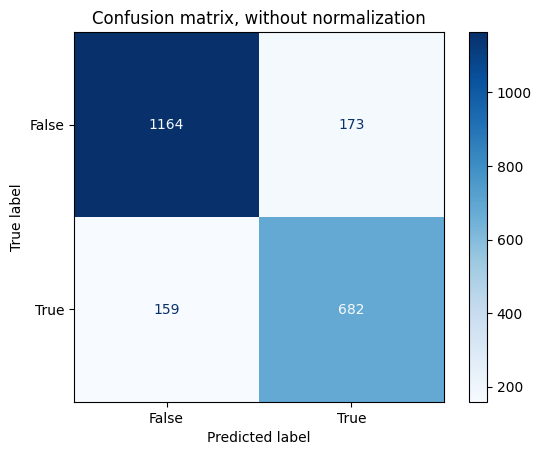

In [ ]:
#visualize classification results with confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
with plt.style.context("default"): #temporarily set the plot style
    disp = ConfusionMatrixDisplay.from_estimator(
        knn_clf,
        X_test_scaled,
        y_test,
        display_labels=[False, True],
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Confusion matrix, without normalization")

### What will happen if you don't scale the data when using this model?

In [ ]:
accuracy_score(y_test, KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test))

0.788337924701561

# Regression demo

Goal: to predict the number of bikes per hour based on other variables.

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,high_count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,False,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,False,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,False,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,False,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,True,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,True,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,False,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,False,22


## Select X and y

In this case, I'm choosing the "count" column as y (the label for our data), and will train the model to predict it.

For X, I'm including relevant features as predictors but excluding features that will leak information about our training target (i.e. "casual",	"registered",	"count", and "high_count").

In [ ]:
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']]
y = df["count"]

print(X.shape)
print(y.shape)

(10886, 9)
(10886,)


## Train-test split

Still 80% for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 9)
(2178, 9)
(8708,)
(2178,)


## Example: Regression using Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


### Training

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(X_train, y_train)

CPU times: user 7.68 s, sys: 140 ms, total: 7.82 s
Wall time: 4.13 s


RandomForestRegressor(n_estimators=200, n_jobs=-1)

### Testing

In [ ]:
y_pred = rf_reg.predict(X_test) #make predictions for the test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(2178,)


array([764.79  ,  40.195 , 288.59  , ..., 394.465 ,  62.5875, 321.373 ])

In [ ]:
y_test

8985     832
3151      26
2630     243
10118    205
4283     365
        ... 
4333      78
1129     223
6601     564
2481      68
7427     302
Name: count, Length: 2178, dtype: int64

In [ ]:
# evaluate the predictions with some metrics
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) #RMSE: root mean square error
print("R²:", r2_score(y_test, y_pred))

RMSE: 69.11013079302677
R²: 0.853684454621515


In [ ]:
y_test.std() #if the RMSE is smaller than the standard deviation of y_test, it's usually a good model

183.4668175880062

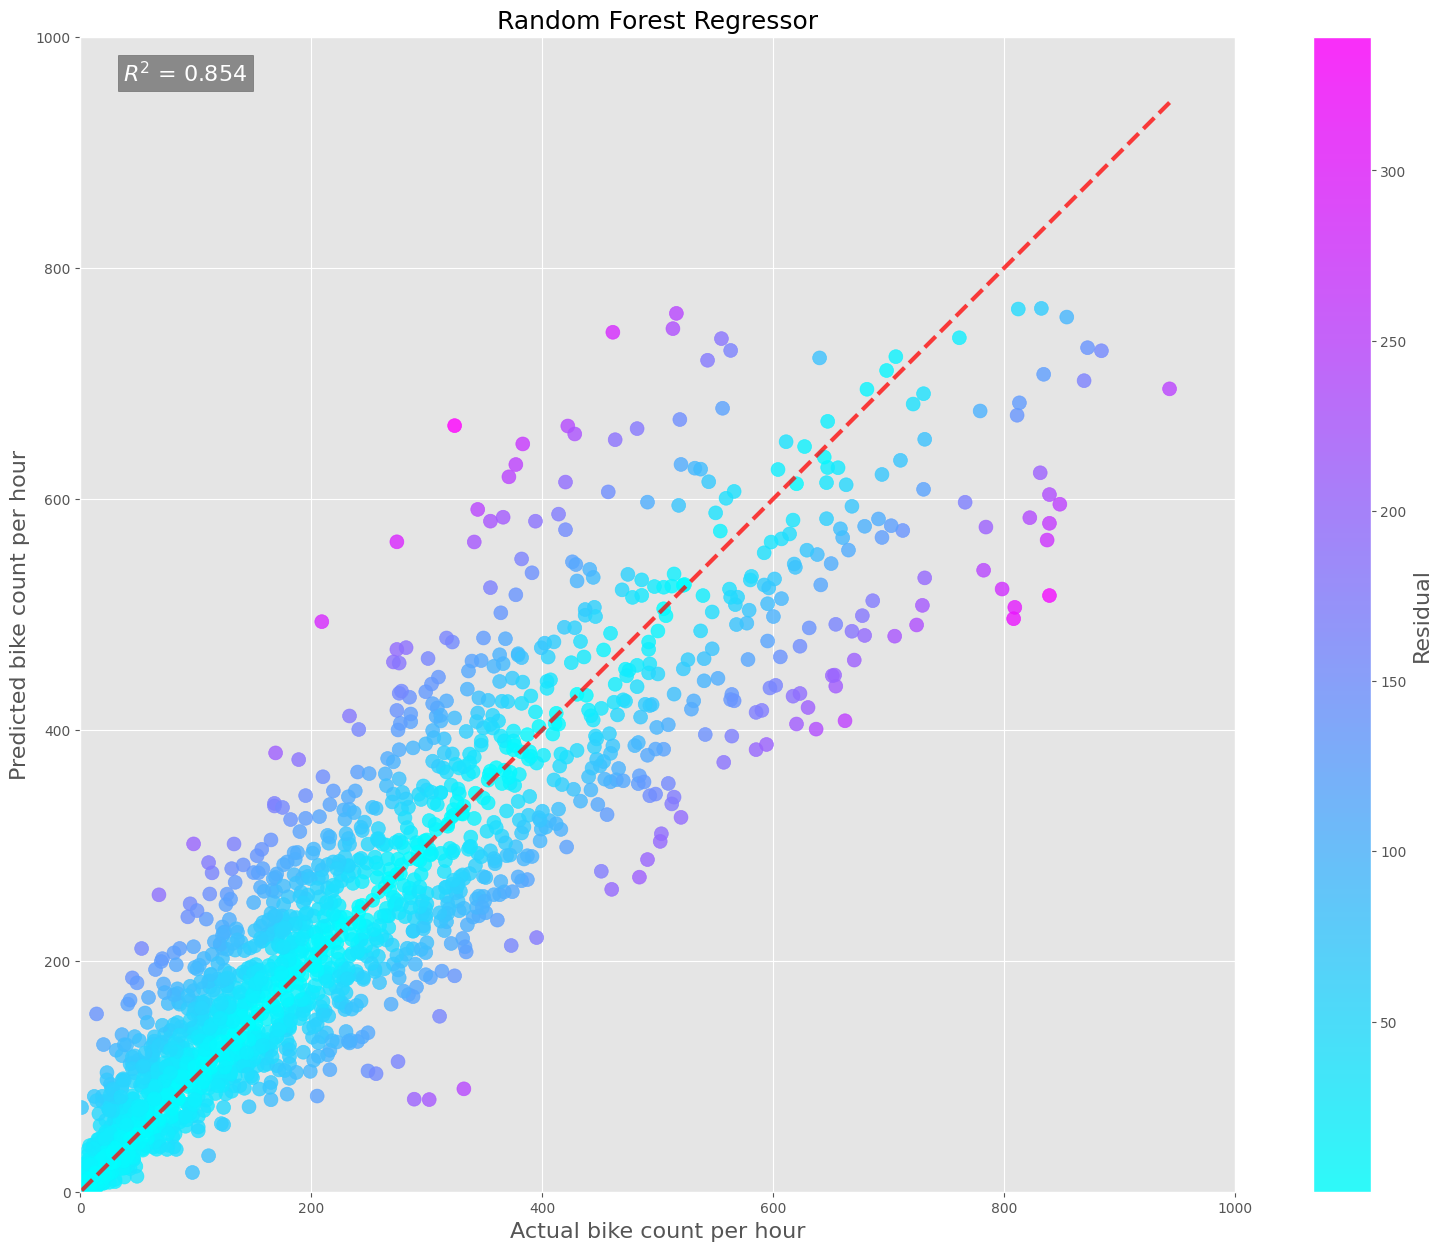

In [ ]:
# visualizing the predictions
def plot_regression(y_true, y_pred, title="", axis_label=""):
  y_residual = np.abs(y_true-y_pred)
  fig, ax = plt.subplots(figsize=(20,15))
  scatter = ax.scatter(x=y_true, y=y_pred, c=y_residual, cmap="cool", marker="o", s=100, alpha=0.8)
  ax.set_xlabel("Actual %s"%axis_label, fontsize=16); ax.set_ylabel("Predicted %s"%axis_label, fontsize=16);
  ax.set_title(title, fontsize=18);
  ax.set_xlim(0, 1000); ax.set_ylim(0, 1000);
  ax.set_aspect(1)
  cbar = plt.colorbar(scatter)
  cbar.ax.set_ylabel("Residual", rotation=90, fontsize=16)
  ax.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], "r--", alpha=0.75, linewidth=3)
  from sklearn.metrics import r2_score
  R_squared = r2_score(y_true, y_pred) #forest.score(X_df, y_df)
  plt.figtext(0.22,0.85,"$R^{2}$ = "+str(R_squared.round(3)), fontsize=16, ha="center",backgroundcolor=(0,0,0,0.4),color="w")

plot_regression(y_test, y_pred, title="Random Forest Regressor", axis_label="bike count per hour")

Conclusion: this is a useful model. 👌

## Example: Regression using Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Feature Scaling

We want all columns of X to be on a similar scale, so the model will treat them similarly (with similar weights).

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler() #by default, this will scale each column to between 0 and 1
# scaler = StandardScaler() #by default, this will scale each column to a z-score (how many standard deviations from the mean)
scaler.fit(X_train) #fit the scaler based on the scale of X_train, and then use the fitted scaler to transform both X_train and X_test (this is the correct way to use the scaler)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 1.0
0.0 1.1398901246147661


### Training

In [ ]:
%%time
from sklearn.linear_model import LinearRegression

linear_regr = LinearRegression()
linear_regr.fit(X_train_scaled, y_train)

CPU times: user 8.62 ms, sys: 8.19 ms, total: 16.8 ms
Wall time: 47 ms


LinearRegression()

### Testing

In [ ]:
y_pred = linear_regr.predict(X_test_scaled) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(2178,)


array([122.11232253, 266.42589449, 298.15207382, ..., 271.22270103,
       214.57732506, 105.51809476])

In [ ]:
# evaluate the predictions with some metrics
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

RMSE: 148.89295688620382
R²: 0.3410799840190286


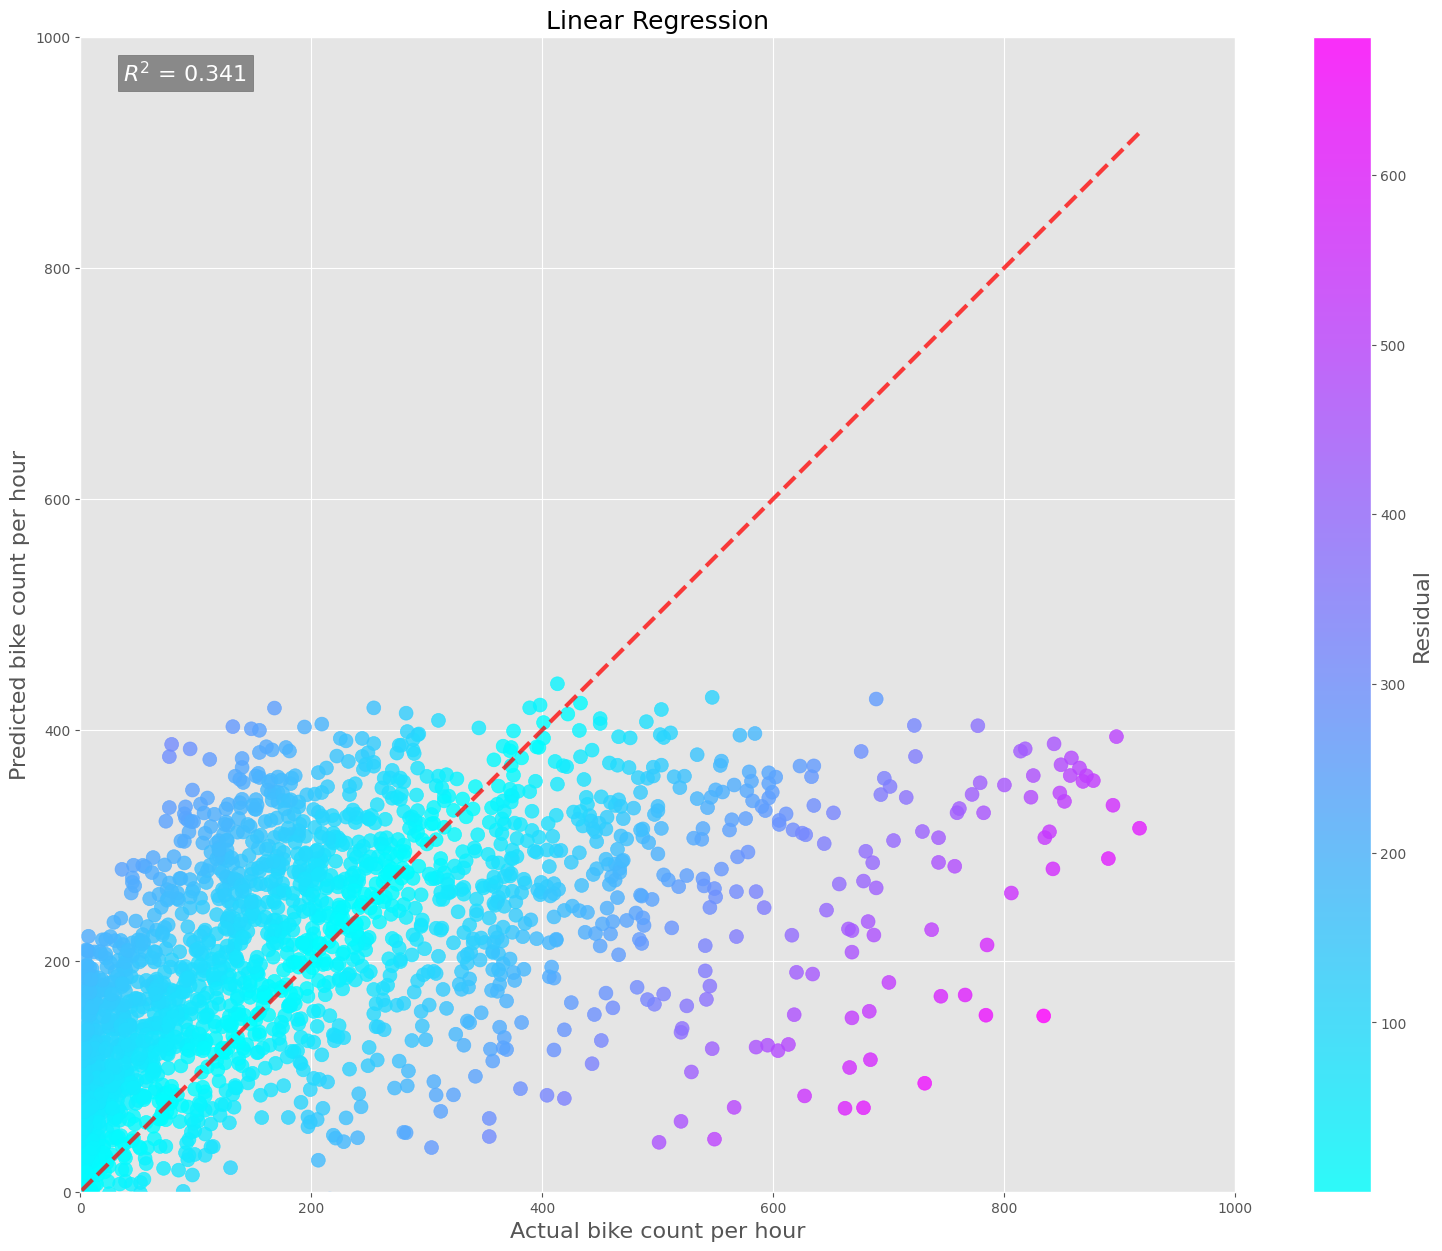

In [ ]:
# visualizing the predictions
plot_regression(y_test, y_pred, title="Linear Regression", axis_label="bike count per hour")

Conclusion: this is a bad model. 😅

# ⚠ Many important things related to ML are not covered in this notebook, such as:

*   Clustering
*   Handling of categorical features (i.e. one-hot encoding)
*   Feature selection and dimensionality reduction
*   Cross-validation
*   Hyperparameter tuning
*   Various ways to evaluate the model
*   The usage of all kinds of ML algorithms and their pros and cons

These will be covered throughout the ML course! 👌

# ML roadmap:

https://scikit-learn.org/stable/tutorial/machine_learning_map/

![alt text](https://miro.medium.com/max/3200/0*dh64A_UgAcVN99mc.png)

Note: this map is still only a tip of the iceberg. 🤣